# Lab 4 - Unioning Uber Pick-Ups, Stations, and Boroughs - SQL

FiveThirtyEight obtained information about all Uber pick-ups in NYC for two 6 month periods through a FOIA request.  More information about the data and subsequent analyses can be found [here](https://github.com/fivethirtyeight/uber-tlc-foil-response).

The combined data are too large for binder, so we have included a sample of 100,000 rows from each table.  In this exercise, you will union the original data from May-Sept 2014, add the base name, add variaous date parts to the data, and finally aggregate the data to answer some questions about the frequency of Uber pick-ups.

The sampled data have been provided in the SQLite database named `uber_samples.db`.

In [2]:
%load_ext pyensae
%SQL_connect ./databases/uber_samples.db
%SQL_tables

The pyensae extension is already loaded. To reload it, use:
  %reload_ext pyensae


['apr14',
 'aug14',
 'base_lookup',
 'janjune15',
 'jul14',
 'jun14',
 'may14',
 'sep14',
 'taxi_zone_lookup']

## <font color="red"> Problem 1 - Inspect the column names for the seven tables of interest.

First, we will focus on the six files from 2014.  **Inspect the column schema for each of these tables.**

In [3]:
%SQL_schema apr14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

In [3]:
%SQL_schema may14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

In [4]:
%SQL_schema jun14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

In [5]:
%SQL_schema jul14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

In [6]:
%SQL_schema aug14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

In [7]:
%SQL_schema sep14

{0: ('Date/Time', datetime.datetime),
 1: ('Lat', float),
 2: ('Lon', float),
 3: ('Base', str)}

The Uber base station names can be found in `base_lookup`.  **Inspect the column schema for each table.**

In [8]:
%SQL_schema base_lookup

{0: ('base_code', str), 1: ('base_name', str)}

Your next task will be joining all the names onto the January-June 2015 data.  **Discuss the columns that will need to be joined.  What type of joins?**

> *Your thoughts here*

## <font color="red"> Problem 2 - Unioning the tables</font>

**Use SQL to join the six Uber tables together into one table.  Use `UNION ALL` to preserve all of the data.**

In [10]:
%%SQL
SELECT *, 'April' as Month
FROM apr14
UNION ALL
SELECT *, 'May' as Month
FROM may14
UNION ALL
SELECT *, 'June' as Month
FROM jun14
UNION ALL
SELECT *, 'July' as Month
FROM jul14
UNION ALL
SELECT *, 'August' as Month
FROM aug14
UNION ALL
SELECT *, 'September' as Month
FROM sep14

,Date/Time,Lat,Lon,Base,Month
0,2014-04-18 21:38:00.000000,40.7359,-73.9852,B02682,April
1,2014-04-23 15:19:00.000000,40.7642,-73.9543,B02598,April
2,2014-04-10 07:15:00.000000,40.7138,-74.0103,B02598,April
3,2014-04-11 15:23:00.000000,40.7847,-73.9698,B02682,April
4,2014-04-07 17:26:00.000000,40.6460,-73.7767,B02598,April
5,2014-04-10 16:56:00.000000,40.7414,-74.0071,B02682,April
6,2014-04-24 23:26:00.000000,40.7181,-73.9500,B02682,April
7,2014-04-23 13:44:00.000000,40.7634,-73.9964,B02598,April
8,2014-04-09 07:05:00.000000,40.7167,-73.9635,B02682,April
9,2014-04-27 15:07:00.000000,40.7216,-73.9977,B02598,April


## <font color="red"> Problem 3 - Adding Date Parts</font>

The questions in the next section ask questions about the day of the day.  The day can be compute using the `strftime` function using `strftime('%d', column)` in the `SELECT` statement.  **Use SQL to add the hour of the day and day of the week to the table**

In [15]:
%%SQL
SELECT *, strftime('%w', Date) AS Day
FROM (SELECT "Date/Time" AS Date, Lat, Lon, Base, 'April' as Month
      FROM apr14
      UNION ALL
      SELECT "Date/Time" AS Date, Lat, Lon, Base, 'May' as Month
      FROM may14
      UNION ALL
      SELECT "Date/Time" AS Date, Lat, Lon, Base, 'June' as Month
      FROM jun14
      UNION ALL
      SELECT "Date/Time" AS Date, Lat, Lon, Base, 'July' as Month
      FROM jul14
      UNION ALL
      SELECT "Date/Time" AS Date, Lat, Lon, Base, 'August' as Month
      FROM aug14
      UNION ALL
      SELECT "Date/Time" AS Date, Lat, Lon, Base, 'September' as Month
      FROM sep14)

,Date,Lat,Lon,Base,Month,Day
0,2014-04-18 21:38:00.000000,40.7359,-73.9852,B02682,April,5
1,2014-04-23 15:19:00.000000,40.7642,-73.9543,B02598,April,3
2,2014-04-10 07:15:00.000000,40.7138,-74.0103,B02598,April,4
3,2014-04-11 15:23:00.000000,40.7847,-73.9698,B02682,April,5
4,2014-04-07 17:26:00.000000,40.6460,-73.7767,B02598,April,1
5,2014-04-10 16:56:00.000000,40.7414,-74.0071,B02682,April,4
6,2014-04-24 23:26:00.000000,40.7181,-73.9500,B02682,April,4
7,2014-04-23 13:44:00.000000,40.7634,-73.9964,B02598,April,3
8,2014-04-09 07:05:00.000000,40.7167,-73.9635,B02682,April,3
9,2014-04-27 15:07:00.000000,40.7216,-73.9977,B02598,April,0


## <font color="red"> Problem 4 - Join the base station name</font>

**Join the unioned table to the `base_lookup` file**

In [18]:
%%SQL
SELECT *
FROM (
        SELECT *, strftime('%w', Date) AS Day
        FROM (SELECT "Date/Time" AS Date, Lat, Lon, Base, 'April' as Month
              FROM apr14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'May' as Month
              FROM may14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'June' as Month
              FROM jun14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'July' as Month
              FROM jul14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'August' as Month
              FROM aug14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'September' as Month
              FROM sep14)) AS U LEFT JOIN base_lookup ON U.Base == base_lookup.base_code

,Date,Lat,Lon,Base,Month,Day,base_code,base_name
0,2014-04-18 21:38:00.000000,40.7359,-73.9852,B02682,April,5,B02682,Schmecken
1,2014-04-23 15:19:00.000000,40.7642,-73.9543,B02598,April,3,B02598,Hinter
2,2014-04-10 07:15:00.000000,40.7138,-74.0103,B02598,April,4,B02598,Hinter
3,2014-04-11 15:23:00.000000,40.7847,-73.9698,B02682,April,5,B02682,Schmecken
4,2014-04-07 17:26:00.000000,40.6460,-73.7767,B02598,April,1,B02598,Hinter
5,2014-04-10 16:56:00.000000,40.7414,-74.0071,B02682,April,4,B02682,Schmecken
6,2014-04-24 23:26:00.000000,40.7181,-73.9500,B02682,April,4,B02682,Schmecken
7,2014-04-23 13:44:00.000000,40.7634,-73.9964,B02598,April,3,B02598,Hinter
8,2014-04-09 07:05:00.000000,40.7167,-73.9635,B02682,April,3,B02682,Schmecken
9,2014-04-27 15:07:00.000000,40.7216,-73.9977,B02598,April,0,B02598,Hinter


In [16]:
%%SQL
SELECT *
FROM base_lookup

,base_code,base_name
0,B02512,Unter
1,B02598,Hinter
2,B02617,Weiter
3,B02682,Schmecken
4,B02764,Danach-NY
5,B02765,Grun
6,B02835,Dreist
7,B02836,Drinnen


## <font color="red"> Problem 4 - Answer some questions</font>

We are interested in answering the following questions.

1. Which of the Uber base stations dispatched the most calls?
2. Which of the days had the most dispatched calls?
3. Is there a difference between the Months in terms of the distribution of pick-ups across weekdays?

**Use SQL to answer the following questions.**

#### Question 1

In [19]:
%%SQL
SELECT Base, Count(*) AS CNT
FROM (
        SELECT *, strftime('%w', Date) AS Day
        FROM (SELECT "Date/Time" AS Date, Lat, Lon, Base, 'April' as Month
              FROM apr14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'May' as Month
              FROM may14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'June' as Month
              FROM jun14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'July' as Month
              FROM jul14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'August' as Month
              FROM aug14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'September' as Month
              FROM sep14)) AS U LEFT JOIN base_lookup ON U.Base == base_lookup.base_code
GROUP BY Base

,Base,CNT
0,B02512,28519
1,B02598,189559
2,B02617,184408
3,B02682,168613
4,B02764,28901


#### Question 2

In [21]:
%%SQL
SELECT Day, Count(*) AS CNT
FROM (
        SELECT *, strftime('%w', Date) AS Day
        FROM (SELECT "Date/Time" AS Date, Lat, Lon, Base, 'April' as Month
              FROM apr14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'May' as Month
              FROM may14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'June' as Month
              FROM jun14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'July' as Month
              FROM jul14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'August' as Month
              FROM aug14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'September' as Month
              FROM sep14)) AS U LEFT JOIN base_lookup ON U.Base == base_lookup.base_code
GROUP BY Day

,Day,CNT
0,0,64178
1,1,71296
2,2,87101
3,3,93669
4,4,100803
5,5,98710
6,6,84243


#### Question 3

In [22]:
%%SQL
SELECT Day, Month, Count(*) AS CNT
FROM (
        SELECT *, strftime('%w', Date) AS Day
        FROM (SELECT "Date/Time" AS Date, Lat, Lon, Base, 'April' as Month
              FROM apr14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'May' as Month
              FROM may14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'June' as Month
              FROM jun14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'July' as Month
              FROM jul14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'August' as Month
              FROM aug14
              UNION ALL
              SELECT "Date/Time" AS Date, Lat, Lon, Base, 'September' as Month
              FROM sep14)) AS U LEFT JOIN base_lookup ON U.Base == base_lookup.base_code
GROUP BY Month, Day

,Day,Month,CNT
0,0,April,9017
1,1,April,10882
2,2,April,16171
3,3,April,19154
4,4,April,15277
5,5,April,15930
6,6,April,13569
7,0,August,13339
8,1,August,11211
9,2,August,12848


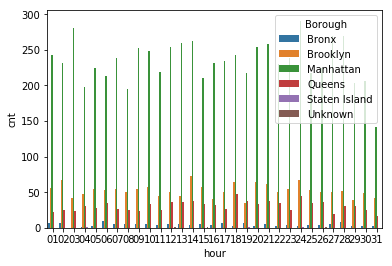

In [41]:
import seaborn as sns

sns.barplot(x='hour', y="cnt", hue ='Borough', data = out)